In [1]:
"""
Set Options
"""

# import libraries
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime
import pickle as pkl

# configuration options
%matplotlib inline
matplotlib.style.use("seaborn-muted")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
plt.style.use('seaborn')
sns.set_palette("husl")

In [2]:
'''
Verify our versions
'''

print("Numpy Version:", np.__version__)
print("MatPlotLib Version:", matplotlib.__version__)

Numpy Version: 1.14.0
MatPlotLib Version: 2.1.2


In [3]:
"""
import pickle file
"""

with open("./data/filtered_data.pkl", 'rb') as picklefile: 
    filtered = pkl.load(picklefile)

In [4]:
filtered.head()

,CONTROL,UNIT,SCP,STATION,ENTRY_FLUX,EXIT_FLUX,DATE
0,A002,R051,02-00-00,59 ST,501.0,177.0,2018-02-25
1,A002,R051,02-00-00,59 ST,1399.0,386.0,2018-02-26
2,A002,R051,02-00-00,59 ST,1465.0,507.0,2018-02-27
3,A002,R051,02-00-00,59 ST,1455.0,520.0,2018-02-28
4,A002,R051,02-00-00,59 ST,1326.0,507.0,2018-03-01


In [5]:
'''Arrange the stations in the descending order of footfalls'''

filtered_station = filtered.groupby(['STATION']).agg({'ENTRY_FLUX':['sum', 'median'], 'EXIT_FLUX' : ['sum', 'median']})
filtered_station.columns = filtered_station.columns.map('_'.join)
filtered_station.sort_values(['ENTRY_FLUX_sum'], ascending = False).reset_index()

,STATION,ENTRY_FLUX_sum,ENTRY_FLUX_median,EXIT_FLUX_sum,EXIT_FLUX_median
0,34 ST-PENN STA,10701055.0,1191.0,7978101.0,880.0
1,34 ST-HERALD SQ,9115976.0,1629.0,6261677.0,1236.0
2,GRD CNTRL-42 ST,8930354.0,1447.0,7929180.0,1135.0
3,23 ST,8823955.0,1302.0,6068022.0,860.0
4,14 ST-UNION SQ,8497203.0,2384.5,6969379.0,1961.0
5,TIMES SQ-42 ST,7827994.0,1637.0,7341618.0,1410.0
6,FULTON ST,6755187.0,571.0,4117847.0,365.0
7,42 ST-PORT AUTH,6251161.0,1600.0,4150332.0,816.0
8,86 ST,5566071.0,1198.0,3442383.0,597.0
9,125 ST,5366347.0,1519.0,4297757.0,1067.0


In [6]:
filtered_penn = filtered[filtered.STATION == '34 ST-PENN STA']
filtered_penn.head()

,CONTROL,UNIT,SCP,STATION,ENTRY_FLUX,EXIT_FLUX,DATE
107652,N067,R012,00-00-00,34 ST-PENN STA,276.0,433.0,2018-02-25
107653,N067,R012,00-00-00,34 ST-PENN STA,780.0,1968.0,2018-02-26
107654,N067,R012,00-00-00,34 ST-PENN STA,788.0,1970.0,2018-02-27
107655,N067,R012,00-00-00,34 ST-PENN STA,798.0,2115.0,2018-02-28
107656,N067,R012,00-00-00,34 ST-PENN STA,814.0,1917.0,2018-03-01


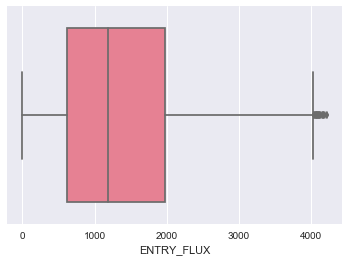

In [13]:
sns.boxplot(x='ENTRY_FLUX', data = filtered_penn);

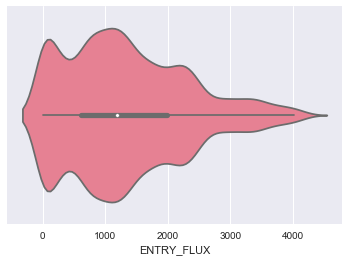

In [12]:
sns.violinplot(x='ENTRY_FLUX', data = filtered_penn);

In [9]:
filtered.ENTRY_FLUX.describe()

count    395321.000000
mean       1032.013905
std         955.558355
min           0.000000
25%         257.000000
50%         812.000000
75%        1560.000000
max        7288.000000
Name: ENTRY_FLUX, dtype: float64

In [7]:
'''Get the GPS locations of the subway stations'''



'Get the GPS locations of the subway stations'